In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.io as pio
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors


from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [98]:
df=pd.read_csv('dt.csv')

In [75]:
df.head(10)

,years_of_experience,claims,referrals,no_calls,relationship_rank,relationship_strength
0,6,2,16,42,1,9
1,8,66,8,13,2,10
2,5,14,6,38,2,8
3,9,42,20,26,2,11
4,5,50,20,45,1,8
5,7,14,12,32,3,8
6,8,50,18,32,3,10
7,7,24,9,83,1,10
8,5,80,5,30,2,9
9,6,26,20,5,3,10


In [99]:
X= df[['years_of_experience', 'claims', 'referrals','no_calls','relationship_rank','relationship_strength']]

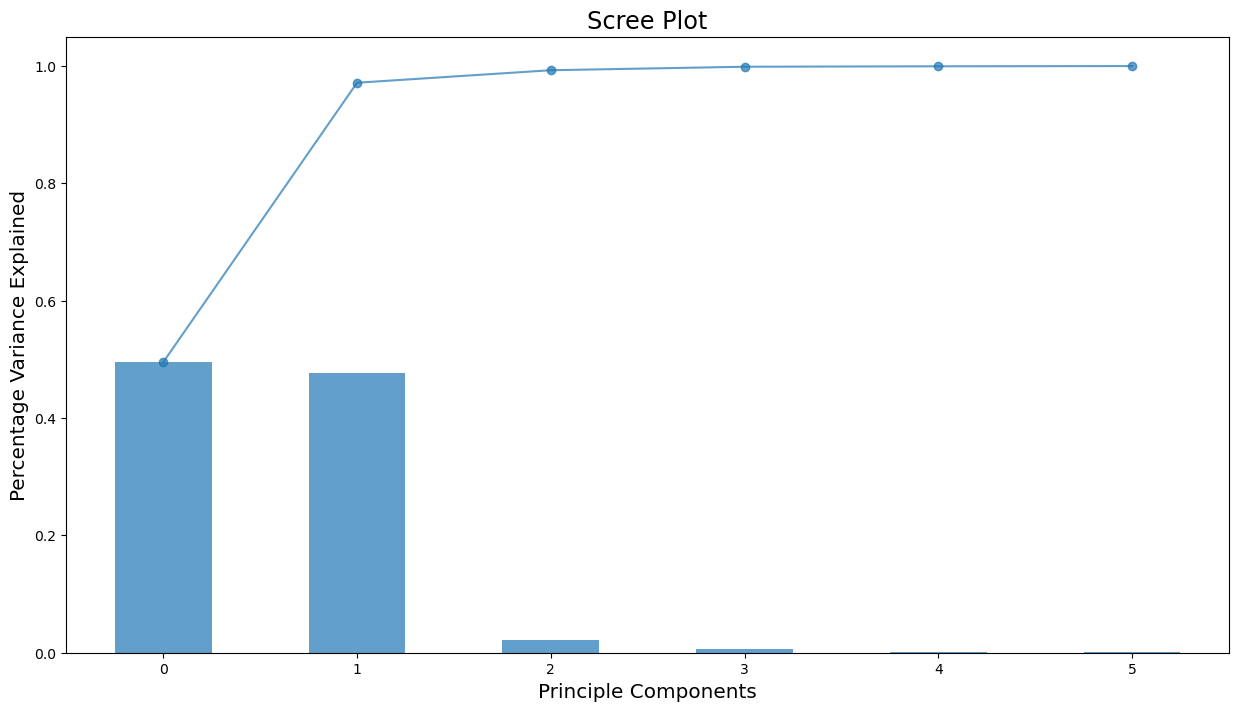

In [100]:
pca = PCA()
pca.fit(X)
sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show();

In [101]:
# create PCA with 3 components
pca = PCA(n_components=3)
X = pca.fit_transform(X)

C:\Users\arajendran\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\arajendran\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\arajendran\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\arajendran\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THRE

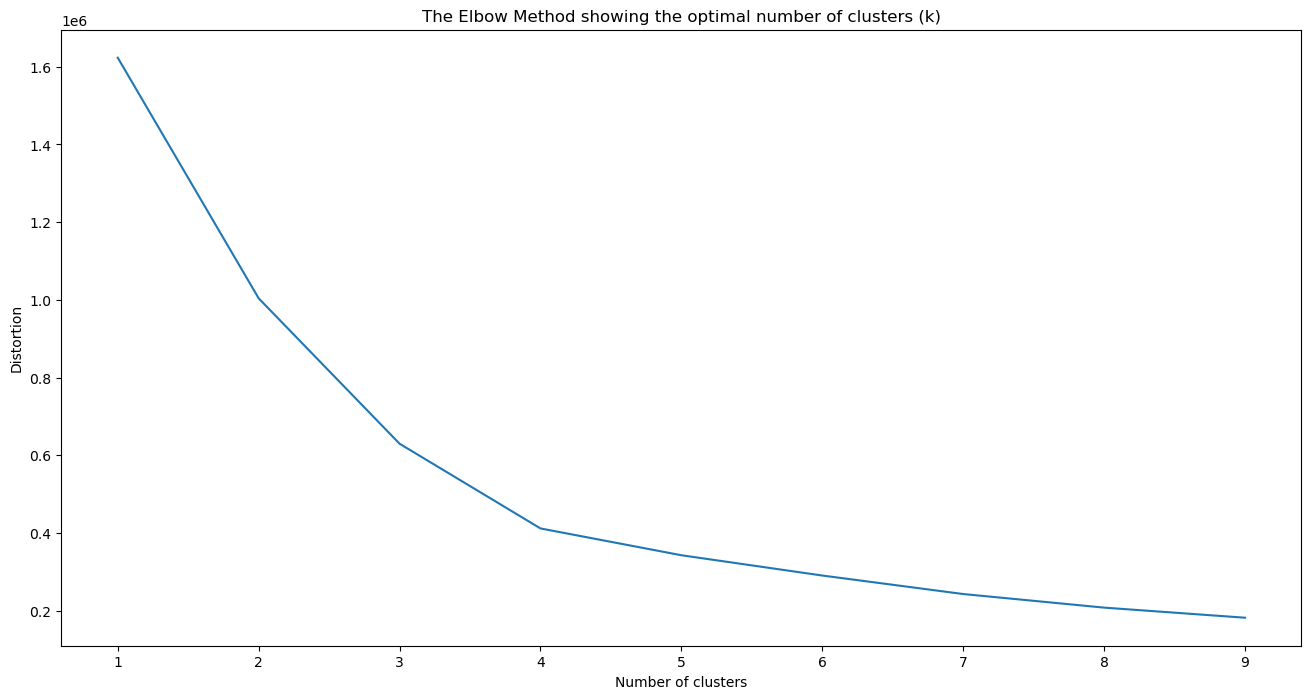

In [95]:
# Create Elbow Plot

w = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

In [104]:
# create a pipeline to scale data and 
# Apply KMeans 
kmean = KMeans(n_clusters=3)

kmean.fit(X)
y_pred = kmean.predict(X)
df['pred_cluster'] = y_pred

C:\Users\arajendran\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\arajendran\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [105]:
# 3d Scatter plot of clusters using K-means
import plotly.express as px

fig = px.scatter_3d(X, x= X[:,0], y= X[:,1],z = X[:,2],
                  color=df['pred_cluster'], labels={'x':'Feature 1', 'y':'Feature 2','z':'Feature 3'} )
fig.show()

In [107]:
data_clus = X


db=DBSCAN(eps=1, min_samples=4).fit(data_clus)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

#Even if we don't specify the number of cluster DBSCAN is good at detecting the number of clusters unlike k-means in which the number of clusters need to be specified. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# add pred_cluster to joined_Users
df['pred_cluster_DBSCAN'] = labels
# set of clusters labels
set(labels)

#3d Scatter plot of clusters using DBSCAN
fig = px.scatter_3d(X, x= X[:,0], y= X[:,1],z = X[:,2],
color=df['pred_cluster_DBSCAN'], labels={'x':'Feature 1', 'y':'Feature 2','z':'Feature 3'} )
fig.show()